In [1]:
import ROOT as rt
import uproot
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

#import gpustat
#gpustat.print_gpustat()
#os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/02


In [2]:
# Random Data Selection
def ran_data(num, total):
    sample_num = []
    for i in range(num):
        samp = np.random.randint(0, high=total+1)
        while samp in sample_num:
            samp = np.random.randint(0, high=total+1)
        sample_num.append(samp)
    return sample_num

def samp_to_df(samp_name, total_num):
    dfs = []
    for i in range(total_num+1):
        file_name = f'../HHbbggAna/condor/output/{samp_name}{i}.root'
        samp_file = uproot.open(file_name)
        samp_array = samp_file['tree'].arrays()
        samp_df = pd.DataFrame(samp_array)
        dfs.append(samp_df)
    combine_df = pd.concat(dfs)
    return combine_df

# Data loading
def data_to_df(job_run, samp_num):
    file_name = f'../HHbbggAna/condor/output/{job_run}/dataJob1ifile{samp_num}.root'
    data_file = uproot.open(file_name)
    data_array = data_file['tree'].arrays()
    data_df = pd.DataFrame(data_array)
    return data_df

In [ ]:
# Load full data??
data_2018_full_dfs = []
for i in range(940):
    data_2018_full_dfs.append(data_to_df('job_1_ntuple_20180802v1', i))
data_2018_full_df = pd.concat(data_2018_full_dfs)

In [3]:
# Set up dataframes - 2018

TTGJets_df_2018 = samp_to_df('job_2_ntuple20180802v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job2ifile', 19)
TTGG_0Jets_df_2018 = samp_to_df('job_3_ntuple20180802v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job3ifile', 28)
TTJets_df_2018 = samp_to_df('job_4_ntuple20180802v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job4ifile', 304)
GluGluToHH_df_2018 = samp_to_df('job_5_ntuple20180802v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job5ifile', 0)
VHToGG_df_2018 = samp_to_df('job_6_ntuple20180802v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job6ifile', 1)
ttHToGG_df_2018 = samp_to_df('job_7_ntuple20180802v1/ttHToGG_M125_TuneCP5_PSweights_13TeV-powheg-pythia8Job7ifile', 2)
VBFHToGG_df_2018 = samp_to_df('job_8_ntuple20180802v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8Job8ifile', 4)
GluGluHToGG_df_2018 = samp_to_df('job_9_ntuple20180802v1/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8Job9ifile', 3)
GJet_SmallPt_df_2018 = samp_to_df('job_10_ntuple20180802v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job10ifile', 15)
GJet_BigPt_df_2018 = samp_to_df('job_11_ntuple20180802v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 10)
DiPhotonJetsBox2B_df_2018 = samp_to_df('job_12_ntuple20180802v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob12ifile', 2)
DiPhotonJetsBox1B_df_2018 = samp_to_df('job_13_ntuple20180802v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob13ifile', 3)
DiPhotonJetsBox_df_2018 = samp_to_df('job_14_ntuple20180802v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob14ifile', 23)

In [4]:
samp_indice_2018 = ran_data(20, 939)
data_2018_dfs = []
for samp in samp_indice_2018:
    data_2018_dfs.append(data_to_df('job_1_ntuple20180802v1', samp))
data_2018_df = pd.concat(data_2018_dfs)

In [6]:
total = np.sum(data_2018_df.loc[:, b'genweight'].values)
print(f'Total: {total}')
rec = np.sum(data_2018_df.loc[:, b'recon'].values * data_2018_df.loc[:, b'genweight'].values)
print(f'Overall recon: {rec}')
brec = np.sum(data_2018_df.loc[:, b'bjet_recon'].values * data_2018_df.loc[:, b'genweight'].values)
print(f'Bjet recon: {brec}')
prec = np.sum(data_2018_df.loc[:, b'photon_recon'].values * data_2018_df.loc[:, b'genweight'].values)
print(f'Photon recon: {prec}')

Total: 28452510.0
Overall recon: 4270.0
Bjet recon: 116946.0
Photon recon: 50348.0


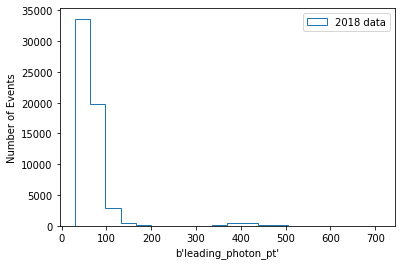

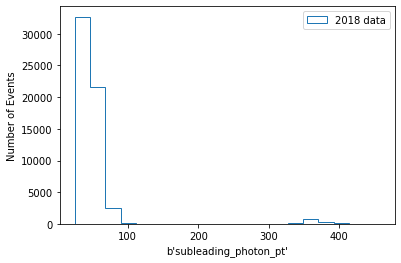

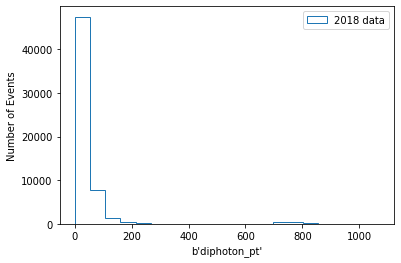

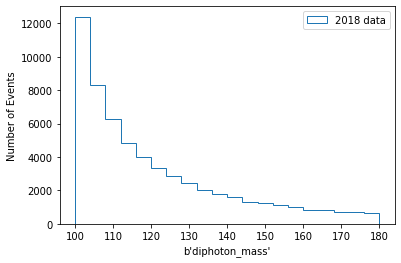

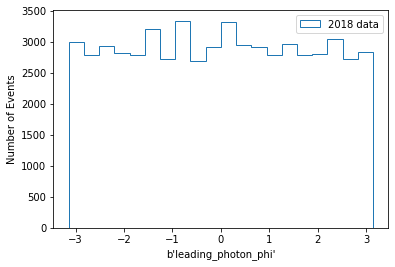

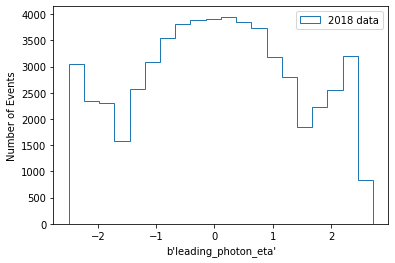

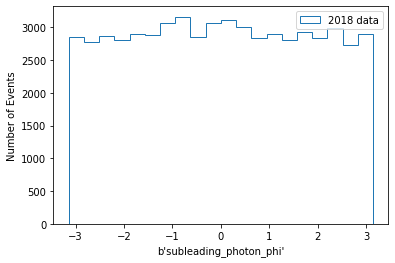

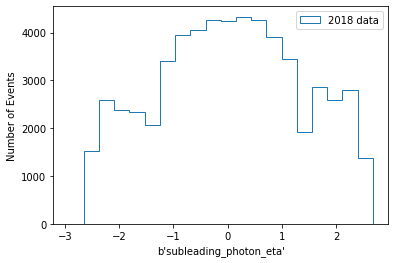

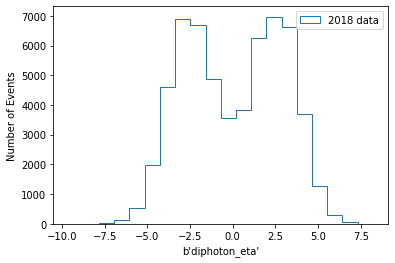

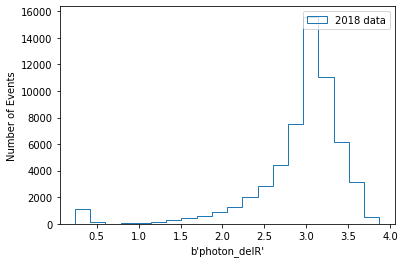

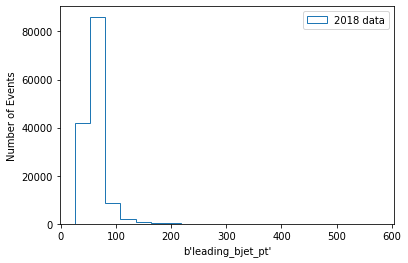

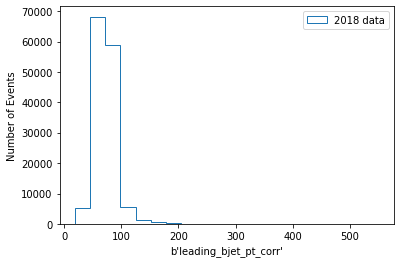

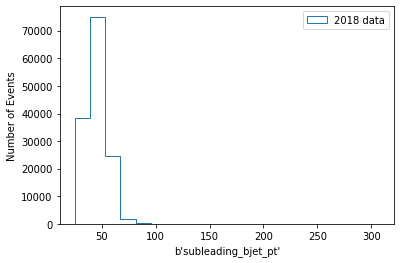

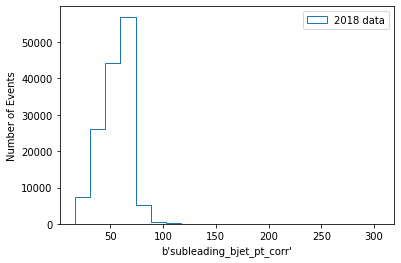

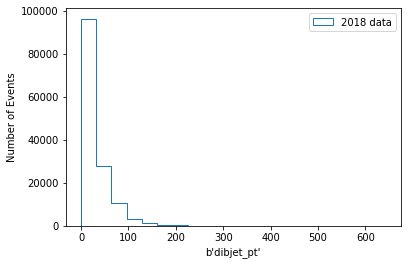

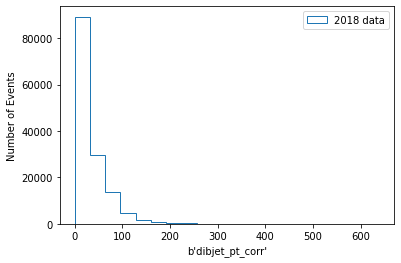

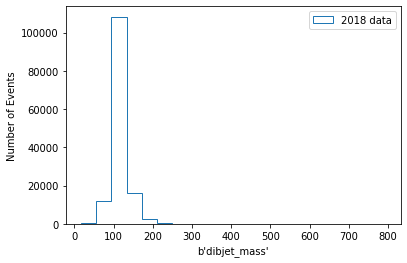

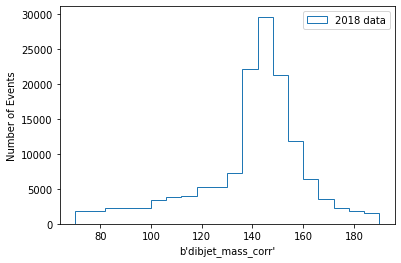

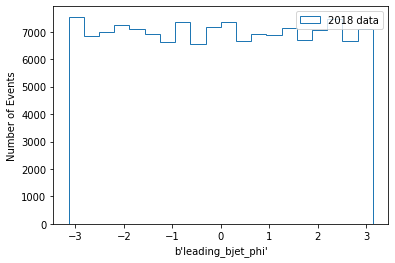

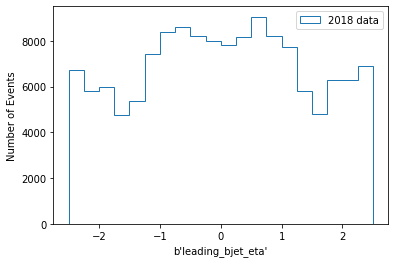

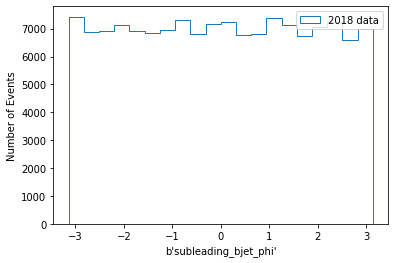

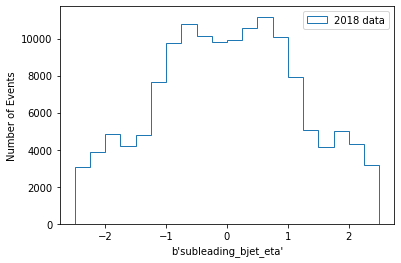

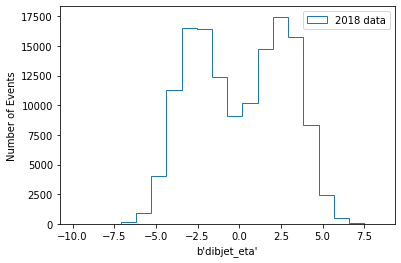

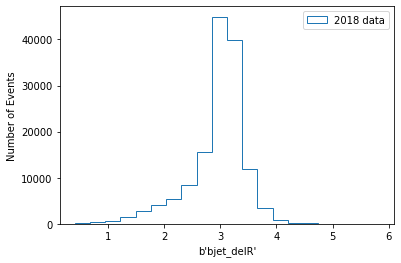

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


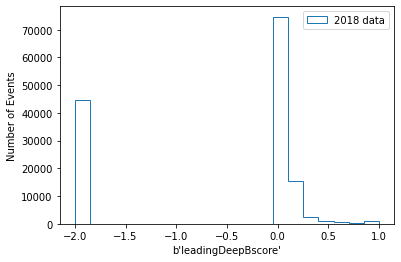

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


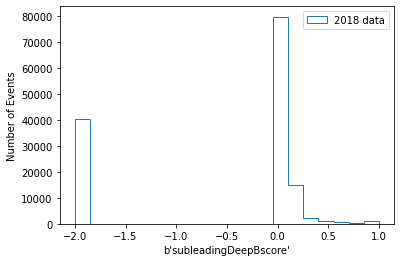

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


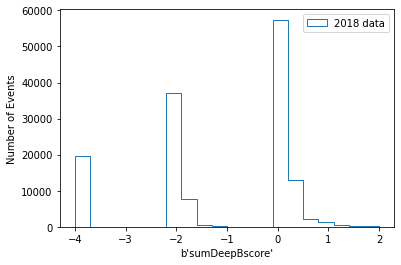

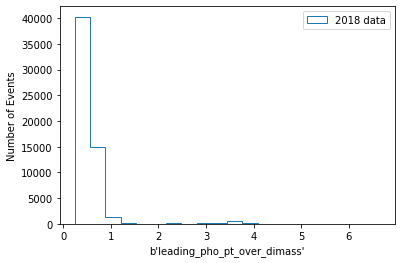

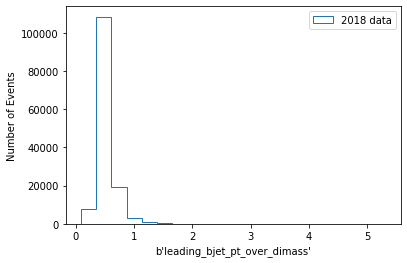

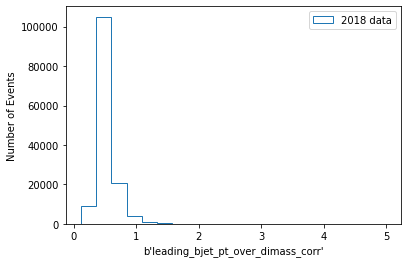

In [16]:
photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]

for pvar in photon_vars:
    vals = data_2018_df.loc[:, pvar].values
    plt.figure()
    plt.hist(vals[vals > -100], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
for bvar in bjet_vars:
    vals = data_2018_df.loc[:, bvar].values
    plt.figure()
    plt.hist(vals[vals > -100], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

for evar in extra_vars:
    vals = data_2018_df.loc[:, evar].values
    plt.figure()
    plt.hist(vals[vals > -100], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

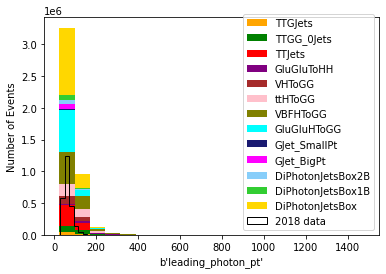

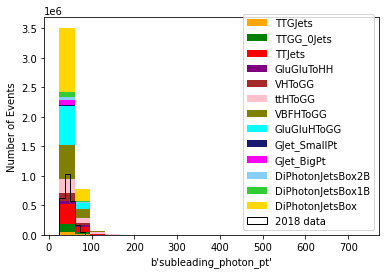

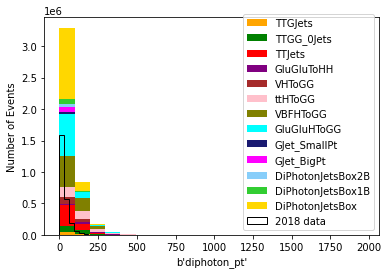

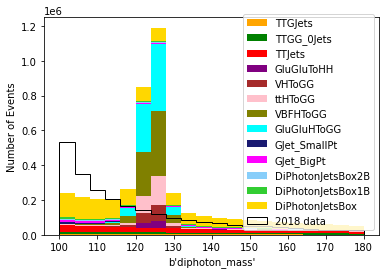

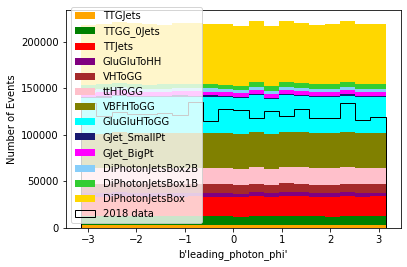

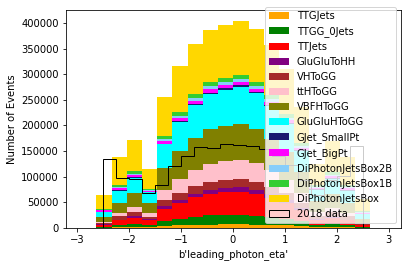

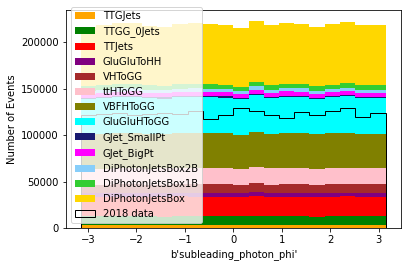

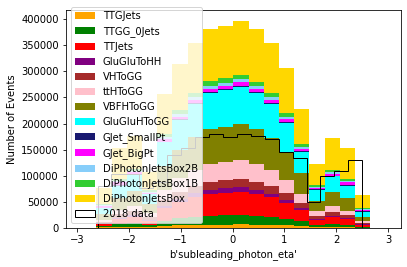

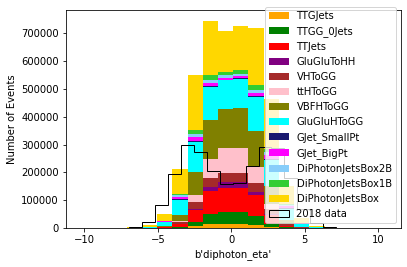

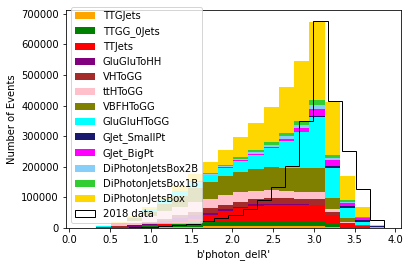

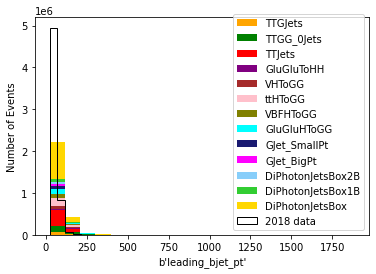

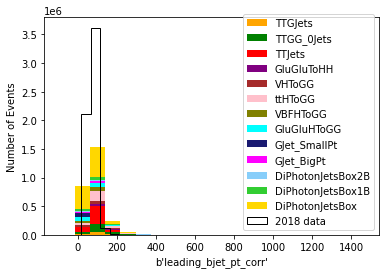

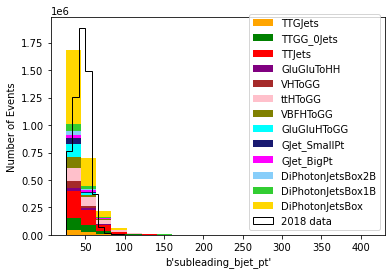

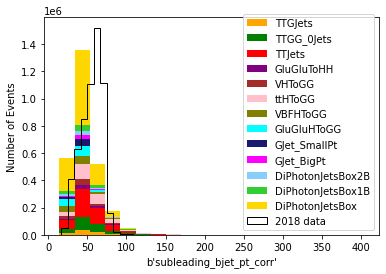

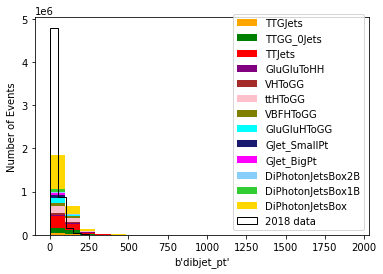

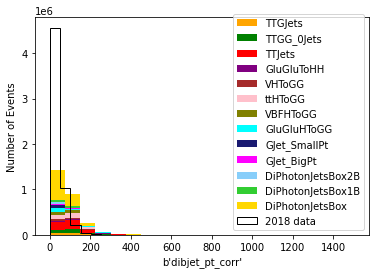

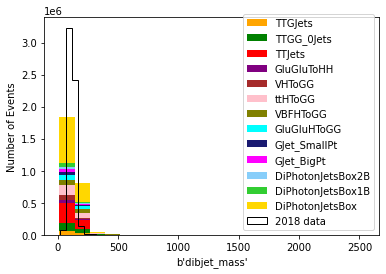

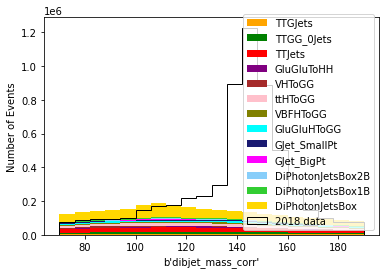

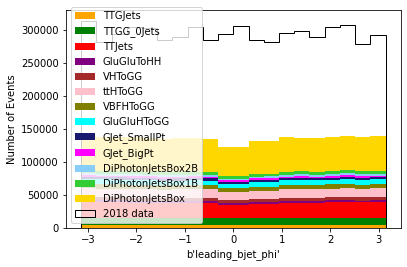

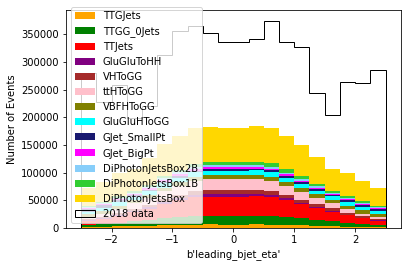

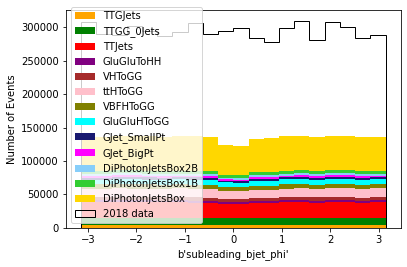

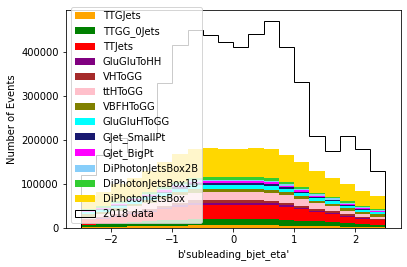

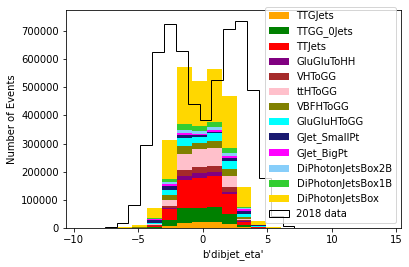

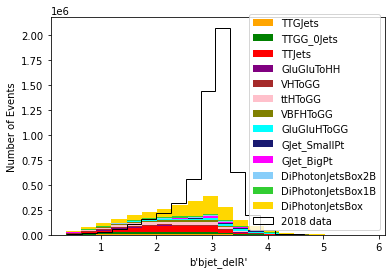

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in greater


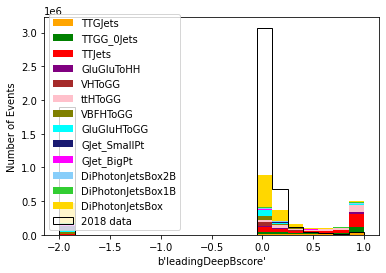

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in greater


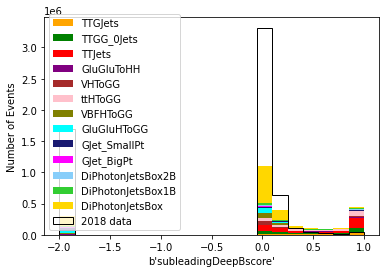

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in greater


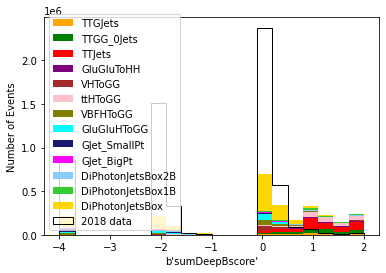

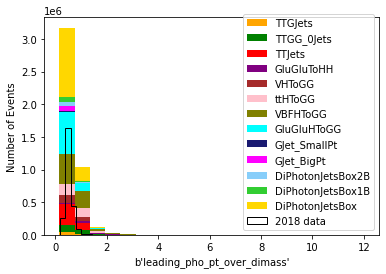

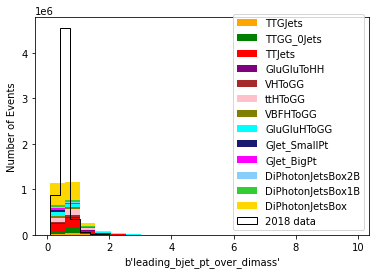

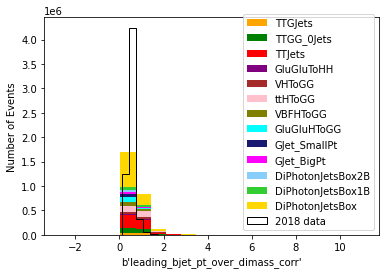

In [7]:
photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [TTGJets_df_2018, TTGG_0Jets_df_2018,TTJets_df_2018, GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018,
      GluGluHToGG_df_2018, GJet_SmallPt_df_2018,  GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018,
      DiPhotonJetsBox_df_2018]
colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']
names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 'GluGluToHH',
        'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 'GJet_SmallPt', 'GJet_BigPt',
        'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox']


for pvar in photon_vars:
    vals = []
    for df in dfs:
        val = df.loc[:, pvar].values
        vals.append(val[val > -100])
    data_vals = data_2018_df.loc[:, pvar].values
    scale = np.full(data_vals[data_vals > -100].shape, 50)
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors)
    plt.hist(data_vals[data_vals > -100], bins=20, weights = scale, histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
for bvar in bjet_vars:
    vals = []
    for df in dfs:
        val = df.loc[:, bvar].values
        vals.append(val[val > -100])
    data_vals = data_2018_df.loc[:, bvar].values
    scale = np.full(data_vals[data_vals > -100].shape, 50)
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors)
    plt.hist(data_vals[data_vals > -100], bins=20, weights = scale,histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

for evar in extra_vars:
    vals = []
    for df in dfs:
        val = df.loc[:, evar].values
        vals.append(val[val > -100])
    data_vals = data_2018_df.loc[:, evar].values
    scale = np.full(data_vals[data_vals > -100].shape, 50)
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors)
    plt.hist(data_vals[data_vals > -100], bins=20, weights = scale ,histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()